In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [179]:
credit=pd.read_csv('/home/sushil/Downloads/creditcard.csv')

In [180]:
credit.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [181]:
credit.drop('Unnamed: 0',inplace=True,axis=1)

In [182]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [85]:
credit.shape

(1319, 12)

In [19]:
credit.corr()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,1.000000,0.044089,0.011023,-0.159011,-0.136538,0.019731,0.048968,-0.007304,0.207755
age,0.044089,1.000000,0.324653,-0.115697,0.014948,0.212146,0.436426,0.009777,0.181070
income,0.011023,0.324653,1.000000,-0.054429,0.281104,0.317601,0.130346,0.107138,0.180540
share,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.082618,-0.055348,0.051470,-0.023474
expenditure,-0.136538,0.014948,0.281104,0.838779,1.000000,0.052664,-0.029007,0.077514,0.054724
dependents,0.019731,0.212146,0.317601,-0.082618,0.052664,1.000000,0.046512,0.010285,0.107133
months,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.046512,1.000000,-0.041447,0.100028
majorcards,-0.007304,0.009777,0.107138,0.051470,0.077514,0.010285,-0.041447,1.000000,0.119603
active,0.207755,0.181070,0.180540,-0.023474,0.054724,0.107133,0.100028,0.119603,1.000000


(array([1023.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         296.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

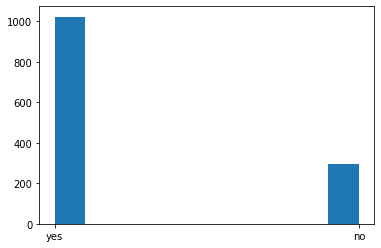

In [21]:
plt.hist(credit.card)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1761076d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd176107d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd176107370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd176096490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1760967f0>],
 'means': []}

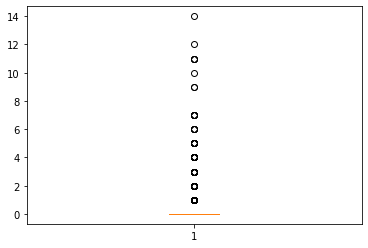

In [24]:
plt.boxplot(credit.reports)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd175fc8850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd175fc8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd175fc84f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd175f57610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd175f57970>],
 'means': []}

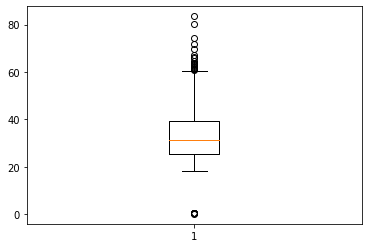

In [27]:
#plt.hist(credit.age)
plt.boxplot(credit.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1760d8040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd1760cb430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1760d8820>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd176301b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd176301fd0>],
 'means': []}

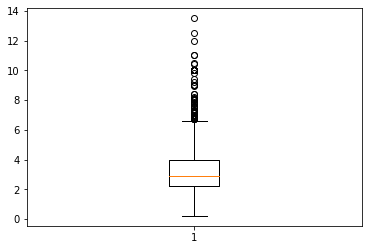

In [29]:
#plt.hist(credit.income)
plt.boxplot(credit.income)

In [32]:
# plt.hist(credit.share)
# plt.boxplot(credit.share)
# plt.hist(credit.expenditure)
# plt.boxplot(credit.expenditure)
# plt.hist(credit.dependents)
# plt.boxplot(credit.dependents)
# plt.hist(credit.months)
# plt.boxplot(credit.months)
# plt.hist(credit.majorcards)
# plt.boxplot(credit.majorcards)
# plt.hist(credit.active)
# plt.boxplot(credit.active)

In [33]:
credit.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

<AxesSubplot:>

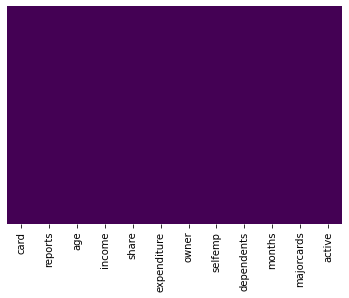

In [38]:
sns.heatmap(credit.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

<AxesSubplot:xlabel='card', ylabel='count'>

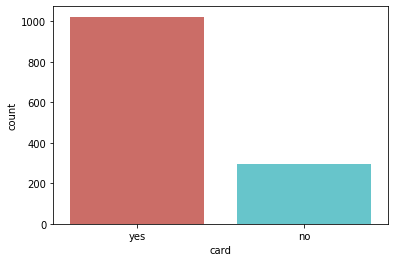

In [42]:
sns.countplot(x='card',data=credit,palette='hls')

<AxesSubplot:xlabel='card'>

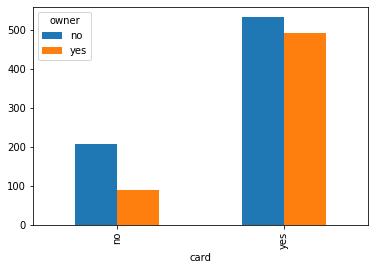

In [43]:
pd.crosstab(credit.card,credit.owner).plot(kind='bar')

<AxesSubplot:xlabel='card'>

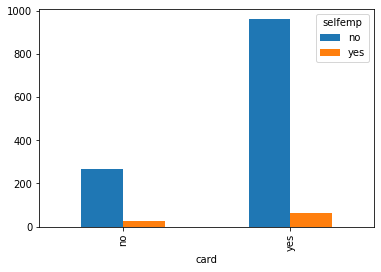

In [44]:
pd.crosstab(credit.card,credit.selfemp).plot(kind='bar')

<AxesSubplot:xlabel='owner', ylabel='count'>

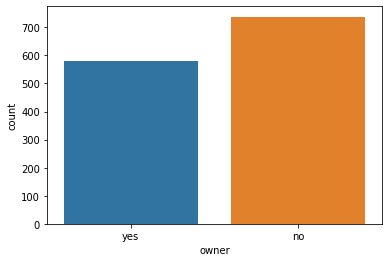

In [49]:
sns.countplot(credit.owner)

<AxesSubplot:xlabel='owner'>

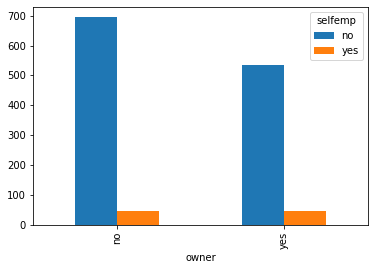

In [46]:
pd.crosstab(credit.owner,credit.selfemp).plot(kind='bar')

<AxesSubplot:xlabel='selfemp', ylabel='count'>

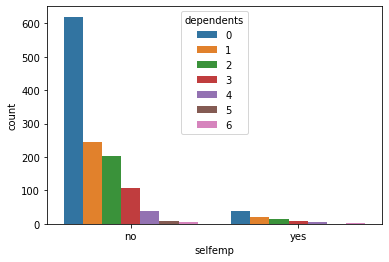

In [51]:
sns.countplot('selfemp', hue ='dependents', data = credit)

<AxesSubplot:xlabel='dependents', ylabel='count'>

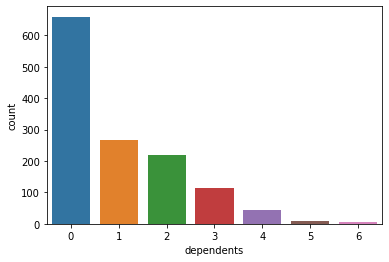

In [54]:
sns.countplot(credit.dependents)

<AxesSubplot:xlabel='owner', ylabel='count'>

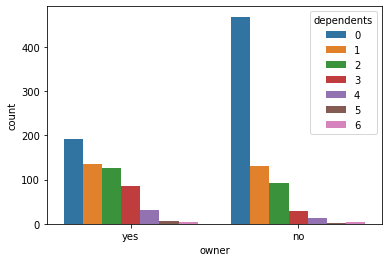

In [55]:
sns.countplot('owner', hue = 'dependents', data = credit)

In [56]:
np.mean(credit.income)

3.3653760424564014

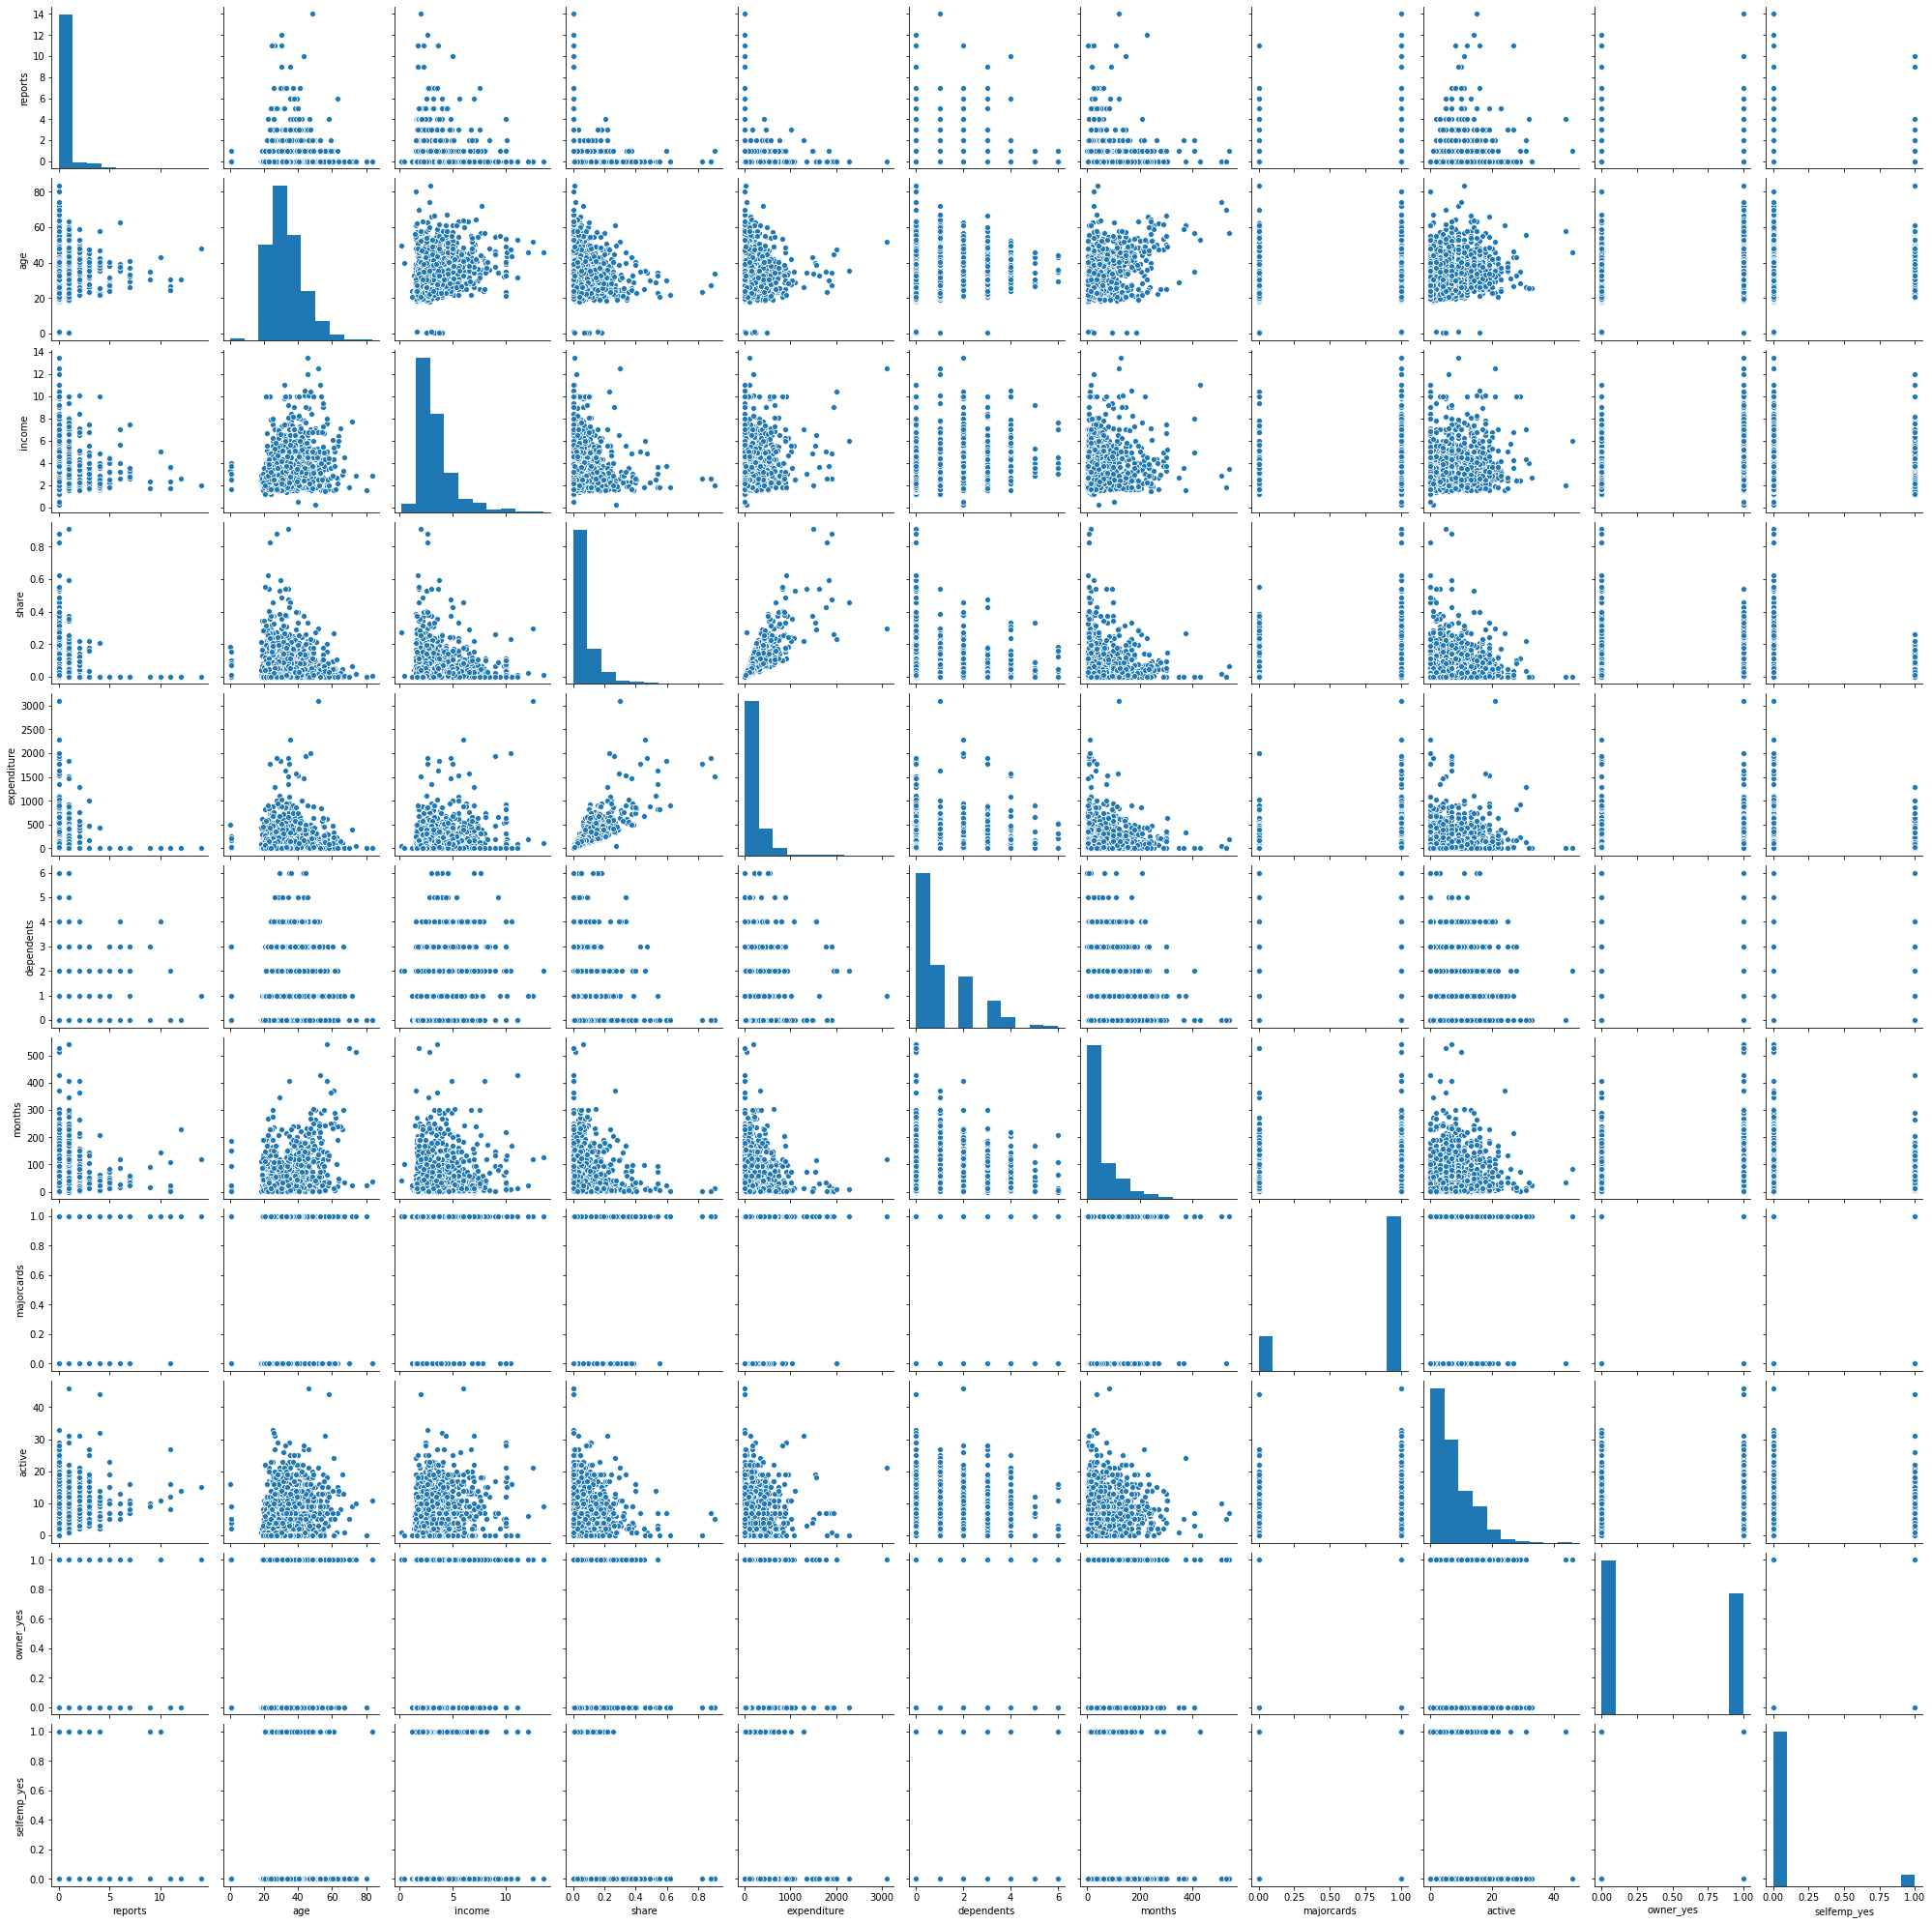

In [143]:
sns.pairplot(credit)

In [183]:
 credit['card'].replace(('yes','no'),(1,0),inplace=True)

In [184]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [185]:
credit = pd.get_dummies(credit,columns=['owner','selfemp'],drop_first = True)

In [186]:
credit.head()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
0,1,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0
1,1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0
2,1,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0
3,1,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0
4,1,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0


<AxesSubplot:xlabel='card', ylabel='reports'>

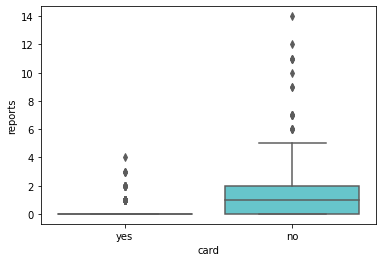

In [89]:
sns.boxplot(x='card',y='reports',data=credit,palette='hls')

In [90]:
x=credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]

In [91]:
x

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,0,94,1,19,1,0
1315,5,23.91667,3.1920,0.000376,0.000000,3,12,1,5,0,0
1316,0,40.58333,4.6000,0.026513,101.298300,2,1,1,2,1,0
1317,0,32.83333,3.7000,0.008999,26.996670,0,60,1,7,0,1


In [92]:
y=credit.iloc[:,0]

In [93]:
y

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
1314    yes
1315     no
1316    yes
1317    yes
1318    yes
Name: card, Length: 1319, dtype: object

In [95]:
classifier = LogisticRegression()

In [96]:
classifier.fit(x,y)

/home/sushil/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
classifier.coef_

array([[-1.65638061e+00,  2.03393977e-02, -1.04291225e-01,
        -1.18799016e-03,  1.66272698e+00, -6.72644922e-01,
        -2.62313968e-03,  4.42020703e-01,  7.63272346e-02,
         4.00377080e-01,  3.65387715e-01]])

In [99]:
classifier.predict_proba(x)

array([[0.00000000e+00, 1.00000000e+00],
       [1.27267417e-06, 9.99998727e-01],
       [7.76508413e-10, 9.99999999e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [101]:
y_pred=classifier.predict(x)

In [102]:
y_pred

array(['yes', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [103]:
credit['y_pred']=y_pred

In [104]:
credit.head()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes,y_pred
0,yes,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0,yes
1,yes,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0,yes
2,yes,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0,yes
3,yes,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0,yes
4,yes,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0,yes


In [105]:
y_prob=pd.DataFrame(classifier.predict(x.iloc[:,:]))

In [106]:
y_prob

,0
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
1314,yes
1315,no
1316,yes
1317,yes


In [112]:
pred= pd.concat([credit,y_prob],axis=1)

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix = confusion_matrix(y,y_pred)

In [118]:
confusion_matrix

array([[ 295,    1],
       [  23, 1000]])

In [119]:
type(y_pred)

numpy.ndarray

In [121]:
accuracy = sum(y==y_pred)/credit.shape[0]

In [122]:
accuracy

0.9818043972706596

In [123]:
pd.crosstab(y_pred,y)

card,no,yes
row_0,,
no,295,23
yes,1,1000


In [290]:
train,test = train_test_split(credit,test_size=0.3)

In [333]:
train

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
323,1,0,0.166667,3.2400,0.184366,497.70580,3,25,1,16,1,0
275,0,4,37.500000,2.6000,0.000462,0.00000,0,40,1,14,0,0
1264,1,0,28.666670,2.9500,0.093613,229.79750,0,26,1,4,0,0
910,0,4,22.000000,2.1000,0.000571,0.00000,0,209,1,10,1,0
1304,1,1,39.083330,3.4224,0.029100,82.65916,0,41,1,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,0,21.250000,1.7500,0.193239,281.80670,0,6,0,3,0,0
618,0,0,23.250000,1.6200,0.000741,0.00000,0,32,1,7,0,0
498,1,0,25.750000,1.8500,0.059652,91.96417,0,24,1,9,1,0
1201,1,0,37.083330,2.8000,0.169929,396.50000,0,36,1,23,0,0


In [334]:
train.shape

(923, 12)

In [335]:
test

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
103,1,0,25.16667,1.80,0.098482,147.723300,0,1,0,9,0,0
235,1,0,30.83333,3.00,0.062629,156.572500,2,72,1,8,1,0
313,1,0,26.16667,4.00,0.001200,3.166667,2,18,0,0,0,0
338,1,0,45.00000,4.03,0.040915,137.071700,0,72,1,2,0,0
64,0,3,27.33333,4.90,0.000245,0.000000,2,16,1,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0,1,33.75000,4.10,0.000293,0.000000,2,22,1,15,1,0
442,0,2,36.58333,2.52,0.000476,0.000000,0,77,1,9,1,0
725,0,0,23.50000,2.50,0.000480,0.000000,0,36,0,0,0,0
1089,1,0,32.08333,1.60,0.263585,351.363300,0,6,1,3,0,0


In [336]:
test.shape

(396, 12)

In [337]:
model = LogisticRegression().fit(train.iloc[:,1:],train.iloc[:,0])

/home/sushil/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [339]:
train_pred=model.predict(train.iloc[:,1:])

In [340]:
train_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [342]:
test_pred = model.predict(test.iloc[:,1:])

In [343]:
test_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [344]:
from sklearn.metrics import accuracy_score

In [345]:
accuracy_score(train.iloc[:,0],train_pred)

0.980498374864572

In [346]:
accuracy_score(test.iloc[:,0],test_pred)

0.9873737373737373